<a href="https://colab.research.google.com/github/FmRadioAlex/-----/blob/main/goit_data_hw_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 [==============================] - 108s 39ms/step - loss: 0.4961 - accuracy: 0.8170 - val_loss: 0.3624 - val_accuracy: 0.8696
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3238 - accuracy: 0.8815 - val_loss: 0.3378 - val_accuracy: 0.8798
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2767 - accuracy: 0.8989 - val_loss: 0.2924 - val_accuracy: 0.8928
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2473 - accuracy: 0.9089 - val_loss: 0.3045 - val_accuracy: 0.8877
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2232 - accuracy: 0.9175 - val_loss: 0.2747 - val_accuracy: 0.8978
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2013 - accuracy: 0.9250 - val_loss: 0.2661 - val_accuracy: 0.9040
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1828 - accuracy: 0.9315 - val_loss: 0.2561 

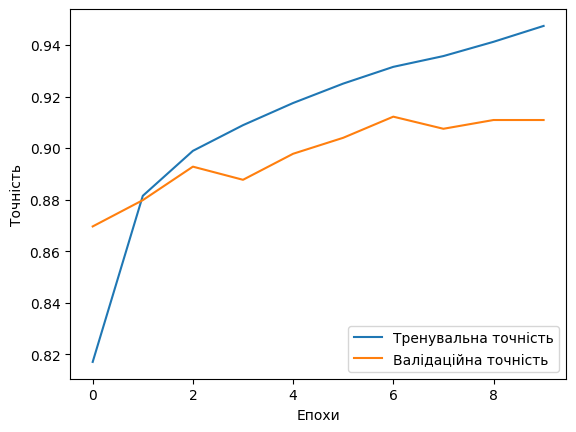

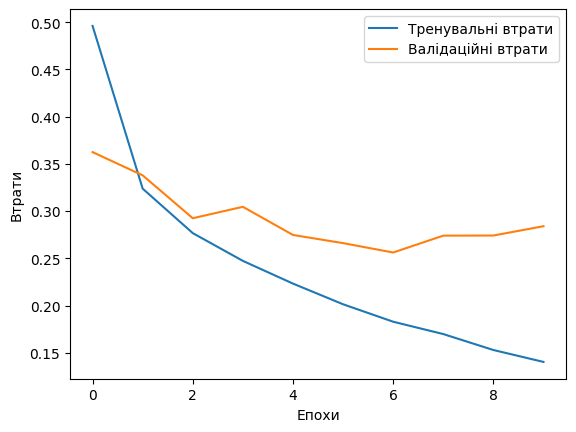

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Завантаження та підготовка датасету
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Додавання каналу до зображень
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Нормалізація пікселів зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Створення моделі згорткової нейромережі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Тренування моделі
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТестова точність: {test_acc}')

# Побудова графіків точності та втрат
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend(loc='upper right')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 936s 499ms/step - loss: 0.8097 - accuracy: 0.7072 - val_loss: 0.6071 - val_accuracy: 0.7798
Epoch 2/10
1875/1875 [==============================] - 907s 484ms/step - loss: 0.6553 - accuracy: 0.7609 - val_loss: 0.5942 - val_accuracy: 0.7824
Epoch 3/10
1875/1875 [==============================] - 926s 494ms/step - loss: 0.6238 - accuracy: 0.7699 - val_loss: 0.5450 - val_accuracy: 0.8003
Epoch 4/10
1875/1875 [==============================] - 924s 493ms/step - loss: 0.6055 - accuracy: 0.7759 - val_loss: 0.5371 - val_accuracy: 0.8047
Epoch 5/10
1875/1875 [==============================] - 922s 492ms/step - loss: 0.5947 - accuracy: 0.7817 - val_loss: 0.5475 - val_accuracy: 0.7983
Epoch 6/10
1875/1875 [==============================] - 921s 491ms/step - loss: 0.5859 - accuracy: 0.7829 - val_loss: 0.5432 - val_accuracy: 0.7949
Epoch 7/10
1875/1875 [==============================] - 932s 497ms/step - loss: 0.5778 - accuracy: 0.7850 - val_

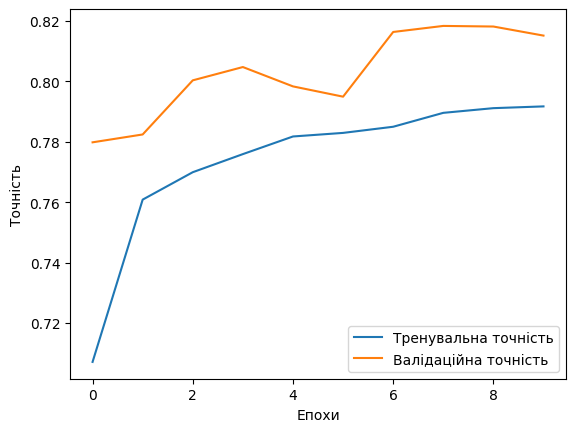

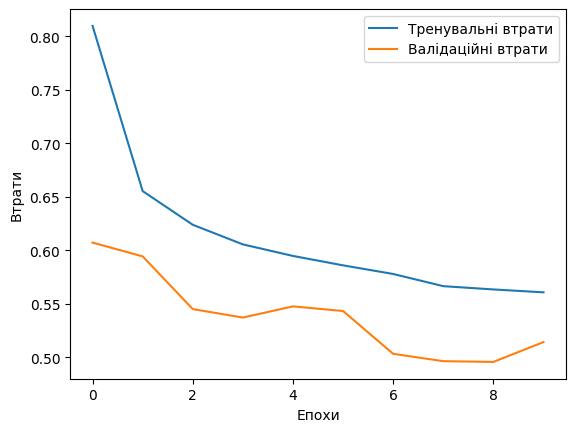

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Завантаження та підготовка датасету
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Додавання каналу до зображень та зміна розміру зображень до (32, 32) для відповідності VGG16
train_images = tf.image.resize(train_images[..., tf.newaxis], [32, 32])
test_images = tf.image.resize(test_images[..., tf.newaxis], [32, 32])

# Перетворення одноканальних зображень на триканальні (RGB)
train_images = tf.image.grayscale_to_rgb(train_images)
test_images = tf.image.grayscale_to_rgb(test_images)

# Нормалізація пікселів зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Перетворення міток у категоріальний формат
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Створення моделі на основі VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожування шарів VGG16
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Використання ImageDataGenerator для збільшення даних
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Тренування моделі з використанням генератора даних
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=10,
                    validation_data=(test_images, test_labels))

# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТестова точність: {test_acc}')

# Побудова графіків точності та втрат
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend(loc='upper right')
plt.show()
